In [1]:
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [2]:
acc_files = (
    'fast_walk.csv',
    'lying.csv',
    'sitting.csv',
    'slow_walk.csv',
    'staying.csv',
)

acc_paths = tuple( 'lab_data/' + name for name in acc_files )

                      file axis      mean       std      disp       min  \
3   lab_data/fast_walk.csv  mag  1.269385  0.811180  0.657289  0.067123   
7       lab_data/lying.csv  mag  0.521224  0.099250  0.009840  0.105353   
11    lab_data/sitting.csv  mag  0.519375  0.077433  0.005989  0.116732   
15  lab_data/slow_walk.csv  mag  0.685442  0.347483  0.120611  0.093573   
19    lab_data/staying.csv  mag  0.526832  0.134229  0.017998  0.037596   

         max     delta    median  
3   4.866580  4.799457  1.095841  
7   1.233146  1.127792  0.512998  
11  1.176762  1.060030  0.514660  
15  3.409125  3.315552  0.619210  
19  1.913073  1.875476  0.511192  


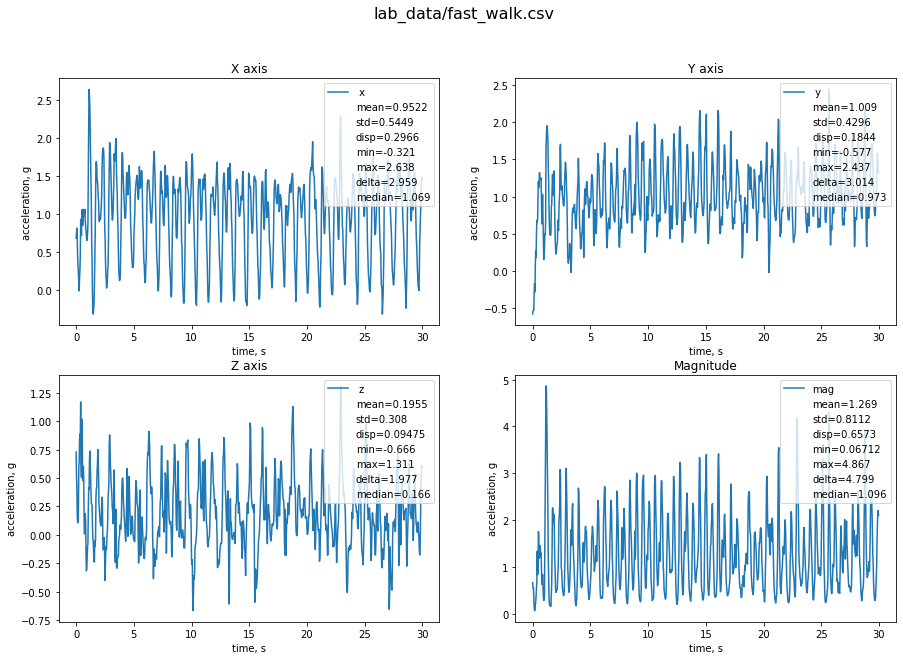

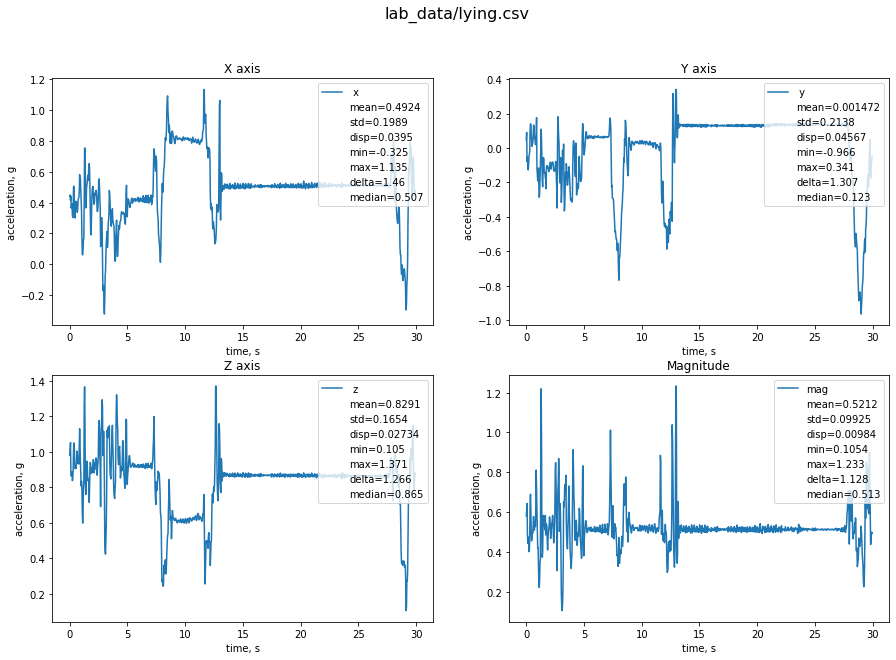

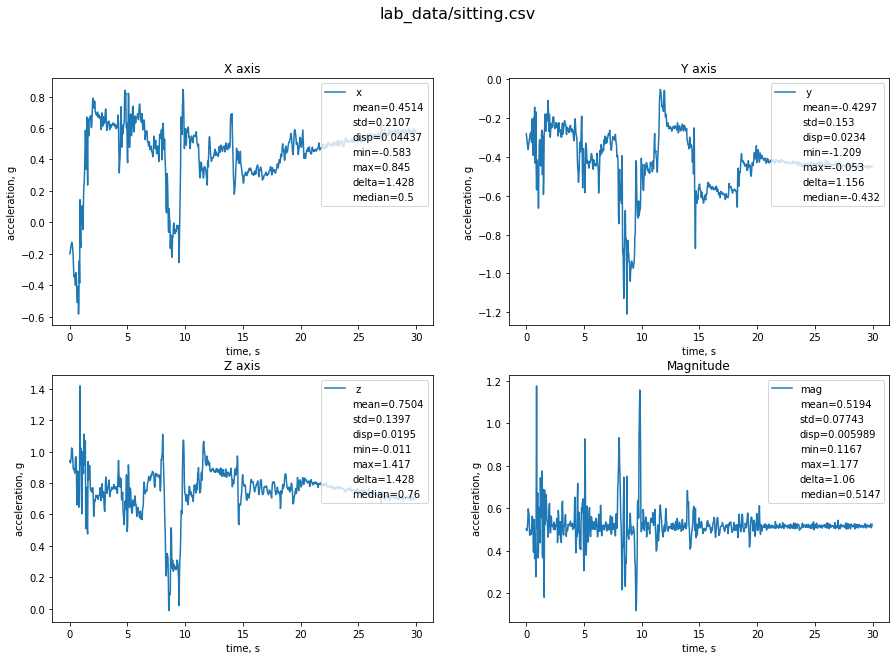

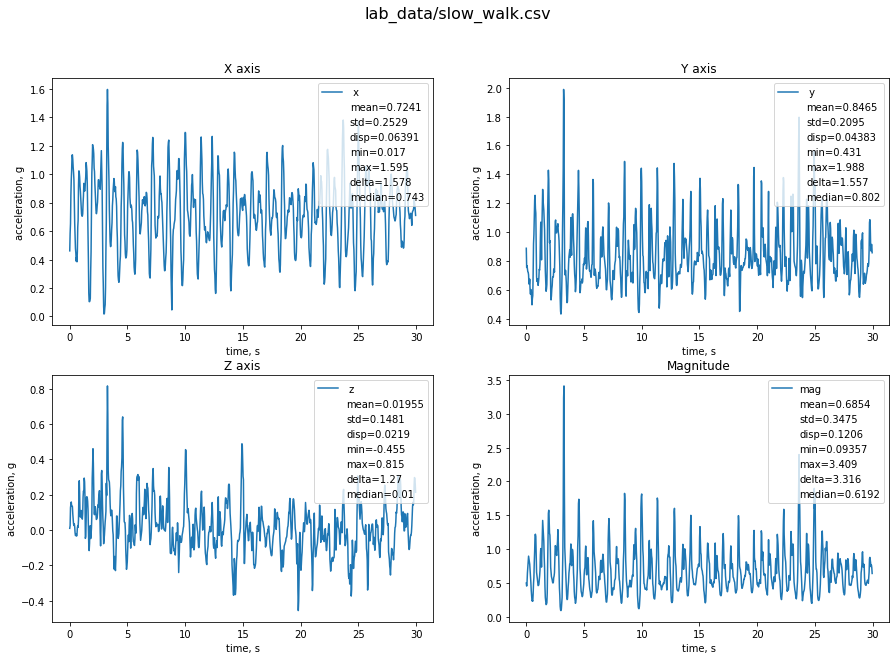

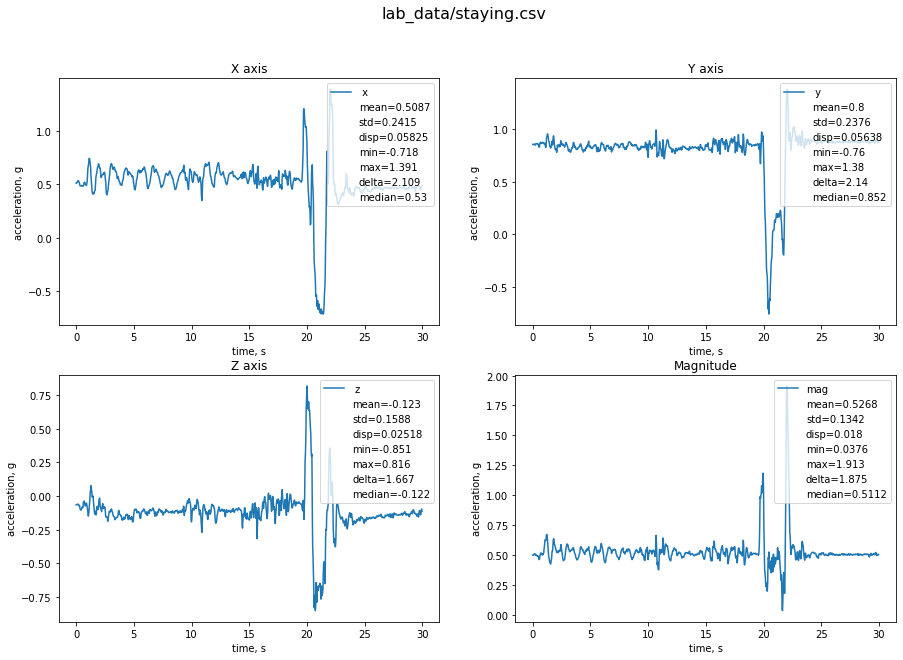

In [4]:
#plt.rcParams['figure.figsize'] = [15, 15]

def add_value_to_legend(ax, text: str):
    ax.plot([], [], ' ', label=text)
    ax.legend(loc='upper right')


def calc_statistic_params(data: df) -> dict:
    std = data.std()
    return {
        'mean': data.mean(),
        'std': std,
        'disp': (std**2) * (data.shape[0]-1) / data.shape[0],
        'min': data.min(),
        'max': data.max(),
        'delta': data.max() - data.min(),
        'median': data.median()
    }
    

data_statistic_paramenters = df()

for filepath in acc_paths:
    data = pd.read_csv(filepath)
    # Convert acceleration to g from mg
    data[[' x', ' y', ' z']] /= 1000
    # Convert date time to seconds since capture start
    data['#dt'] = (data['#dt'] - data['#dt'][0]) / 1000000
    # Calculate magnitude
    data['mag'] = (data[[' x', ' y', ' z']]**2).sum(axis=1) ** 1/2
    
    plot_axes = (' x', ' y', ' z', 'mag')
    titles = ('X axis', 'Y axis', 'Z axis', 'Magnitude')
    
    fig, axes = plt.subplots(nrows=int(len(plot_axes)/2), ncols=2)
    fig.set_size_inches(15, 10)
    fig.suptitle(filepath, fontsize=16)
    
    for n, x, title in zip(range(len(plot_axes)), plot_axes, titles):
        ax = axes[n >> 1, n & 1]
        data.plot(x='#dt', 
                  y=[x], 
                  ax=ax, 
                  title=title, 
                  xlabel='time, s', 
                  ylabel='acceleration, g')
        
        statistic_params = calc_statistic_params(data[x])
        data_statistic_paramenters = data_statistic_paramenters.append(
            {'file': filepath, 'axis': x, **statistic_params}, 
            ignore_index=True
        )
        
        for (key, value) in statistic_params.items():
            add_value_to_legend(ax, f'{key}={value:.4}')
        
print(data_statistic_paramenters.loc[data_statistic_paramenters['axis'] == 'mag'])

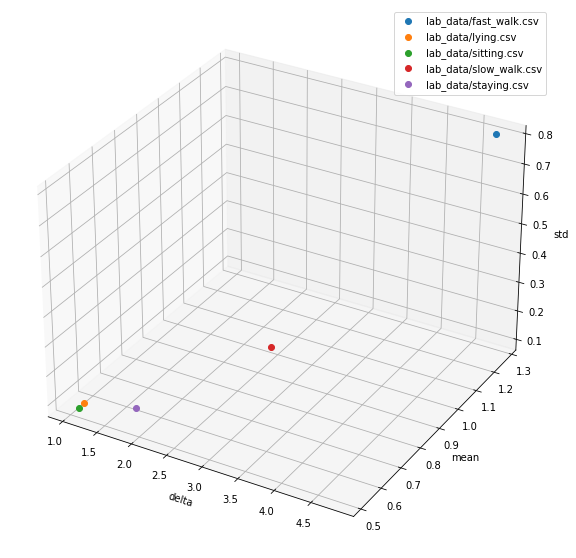

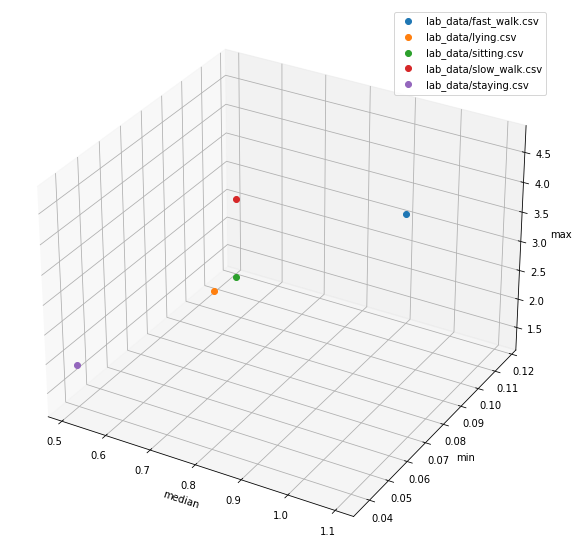

In [5]:
def vizualize_statistic_data(data, feature):
    fig = plt.figure(figsize=(15, 10))
    ax = plt.axes(projection='3d')
    ax.set_xlabel(feature[0])
    ax.set_ylabel(feature[1])
    ax.set_zlabel(feature[2])
    
    for src in data['file'].unique():
        dp = data.loc[(data['file'] == src) & (data['axis'] == 'mag')]
        ax.plot3D(dp[feature[0]], dp[feature[1]], dp[feature[2]], 'o', label=src)
    
    ax.legend(loc='upper right')
    
        
vizualize_statistic_data(data_statistic_paramenters, ('delta', 'mean', 'std'))
vizualize_statistic_data(data_statistic_paramenters, ('median', 'min', 'max'))